# Assignment 3 Info


In [116]:
# Output larger plots within the Jupyter notebook
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [24, 12]
matplotlib.rcParams['figure.dpi'] = 120

## General TODO
- Changelog (i.e. what did we improve based on the last submission)?
  - Compare to actually submitted version before finishing
- Improve visualization of plots
  - Export all plots into separate PDFs for better visualization...
  - ...or change size within jupyter

## Changelog
- Introduction and problem description parts are added.
- Added comments to code blocks
- Changed some variable names for clarity
- Removed old or incomplete text cells
- Simplified check for people with same surname
- Added code at the beginning to output larger plots, as indicated by the feedback.
- Placed all of the data scraping into a single cell that does not run automatically (even if the entire notebook is executed)

## Class Notes
- Use BeautifulSoup (4) for html scraping
  - https://realpython.com/python-web-scraping-practical-introduction/
  - https://realpython.com/beautiful-soup-web-scraper-python/#step-1-inspect-your-data-source
  - `.prettify()` can be useful to look at the source code
- To join absolute and reltative pages: use module `urlparse`
  - `urlparse.urljoin(url1, url2)`
- To actually *get* the page, you should use the module `requests`
  - `page = requests.get(URL)`
  - `soup = BeautifulSoup(page.content , "html.parser"`
- Process:
  - How ma

## Group 14 Names and Student IDs
- Antonio Sanchez Martin - ''5245834''
- Felix Unger - ''5673631''
- Jeroen van Paassen - ''4720970''
- Yunus Emre Torlak - ''5597668''

## Introduction

Tabularazor Inc. is a large national newspaper that covers a diverse range of topics (from sport to finance). Unfortunately, their archive server is no longer accessible due to an electrical problem. However, they were able to retrieve the archives of prior years' data thanks to the implementation of an effective backup plan. 

Metadata is developed and collected to make data easier to use. Human flaws can be compensated for with good metadata. Metadata ensures that people can find and use data in the future, as well as preserve and re-use it.(UNC University, 2022) Moreover, a good analysis of metadata can also give different and important results to the analysts.

In this report, Tabularazor Inc. archive and the metadatas of the archive are analyzed and an investigation had been perfomed.

## Problem Description

Tabularazor Inc. lost their connection to their archive server. There is a demand for an investigation for the employees of the company. The data for the investigation, must be extracted from the company's archive (https://jdestefani.github.io/SEN163A-TabularRazorArchives/). 

Extracting data from a website is called as data scraping or web scraping. The process starts with identfying the target website, for this case it's  Tabularazor Archives. Secondly,  URLs of the pages should collected. For the URL, a request is created to get the HTML of the page. With the help of locators, the desired data is found in the HTML page and the data is saved in a JSON or CSV file or another structured format (Kenny, 2022). However, if the required data is big and the process will take more time. Therefore, process must be parallelized especially when the computational power is low.

Data extraction is the first step of the research. After extracting the data, in order to gather some knowledge from the data an analysis must be performed with the help of various visualizations and calculations of the data. 

Within the scope of the research, there are three main questions that are requested to be investigated:
1. Are there couples among the employees. If so, who? Are they still together?
2. Did any of the employees have a child? If so, who?
3. If you would be looking to work for Tabularazor Inc., how many holidays can you expect to get per year?
The roadmaps used for answering the questions will be eloborated in more detail under the related title of each question.

# Data Scraping
*TODO: Describe the entire scraping process in text*

There are various tools and libraries for data scraping, such as: Selenium, Scrapy, Beautiful Soup, Requests...For this research Requests is used to obtain data and Beautiful Soup is used to format data.  
In order to increase the reusability of the code, the link is assigned to a variable.

In [117]:
website = 'https://jdestefani.github.io/SEN163A-TabularRazorArchives/' # root site

In [118]:
import requests
import bs4 as bs

get_soup = lambda link: bs.BeautifulSoup(requests.get(link).content) # get website source code based on link
soup = get_soup(website)
print(soup.prettify())

<html>
 <head>
  <title>
   Articles
  </title>
 </head>
 <body>
  <h1>
   All articles
  </h1>
  <br/>
  <br/>
  <h2>
   Articles year 2012
  </h2>
  <br/>
  <div class="yearlink">
   <a href="./2012.html">
    Articles in 2012
   </a>
  </div>
  <h2>
   Articles year 2013
  </h2>
  <br/>
  <div class="yearlink">
   <a href="./2013.html">
    Articles in 2013
   </a>
  </div>
  <h2>
   Articles year 2014
  </h2>
  <br/>
  <div class="yearlink">
   <a href="./2014.html">
    Articles in 2014
   </a>
  </div>
  <h2>
   Articles year 2015
  </h2>
  <br/>
  <div class="yearlink">
   <a href="./2015.html">
    Articles in 2015
   </a>
  </div>
  <h2>
   Articles year 2016
  </h2>
  <br/>
  <div class="yearlink">
   <a href="./2016.html">
    Articles in 2016
   </a>
  </div>
  <h2>
   Articles year 2017
  </h2>
  <br/>
  <div class="yearlink">
   <a href="./2017.html">
    Articles in 2017
   </a>
  </div>
  <h2>
   Articles year 2018
  </h2>
  <br/>
  <div class="yearlink">
   <a href="./

In [119]:
# Get all links on site
from urllib.parse import urljoin

def get_links(to_scrape = 'https://jdestefani.github.io/SEN163A-TabularRazorArchives/'):
    """Gets list of all links (complete path) on provided site

    Args:
        to_scrape (str, optional): Website to scrape. Defaults to 'https://jdestefani.github.io/SEN163A-TabularRazorArchives/'.

    Returns:
        (list): List with all links in the source code
    """
    soup = get_soup(to_scrape)
    links = soup.find_all('a', href=True)
    if links is False: # if there are no links, return empty array
        return [] 
    links = [urljoin(to_scrape, link['href']) for link in links] # join with root to get full path
    return links

print(get_links(to_scrape=website))

['https://jdestefani.github.io/SEN163A-TabularRazorArchives/2012.html', 'https://jdestefani.github.io/SEN163A-TabularRazorArchives/2013.html', 'https://jdestefani.github.io/SEN163A-TabularRazorArchives/2014.html', 'https://jdestefani.github.io/SEN163A-TabularRazorArchives/2015.html', 'https://jdestefani.github.io/SEN163A-TabularRazorArchives/2016.html', 'https://jdestefani.github.io/SEN163A-TabularRazorArchives/2017.html', 'https://jdestefani.github.io/SEN163A-TabularRazorArchives/2018.html', 'https://jdestefani.github.io/SEN163A-TabularRazorArchives/2019.html']


In [120]:
# WEB SCRAPING
# Comment this line out of you want to run this cell
%%script false --no-raise-error

import pandas as pd
import threading
import concurrent.futures

class Scraper:
    def __init__(self, website:str):
        self.scraped_data = list() # create a list to append all website inforation
        self._lock = threading.Lock() # lock object for sharing the list across threads
        self.scrape(website)
        fields = ['link','author', 'date', 'time'] # columns of table
        self.scraped_data= pd.DataFrame(self.scraped_data, columns = fields) # export as a dataframe

    def scrape(self, website, domain = 'https://jdestefani.github.io/SEN163A-TabularRazorArchives/'): 
        """Scrape a website based on the link. It is recursive. If there are links on the provided site, it then crawls those links until no links are found. It creates a list which is converted into a dataframe in __init__()

        Args:
            website (str): Website to search
            domain (str, optional): Only search sites within that domain (helps avoiding crawling "stray" links). Defaults to 'https://jdestefani.github.io/SEN163A-TabularRazorArchives/'.
        """
        all_links = get_links(website) # list with all links in the provided site
        if all_links:
            # Keep on searching (i.e. recursive state)
            with concurrent.futures.ThreadPoolExecutor() as executor: # start the different threads for parallelization
                for link in all_links:
                    if domain in link:
                        print(f"Scraping: {link}\n")
                        executor.submit(self.scrape, link, domain = domain) # submit recursive call to new thread
        else:
            # Get the data (i.e. base case)
            soup = get_soup(website) # get the soup object for extracting info
            web_info= list()
            web_info.append(website)
            web_info.append(soup.find_all('div', class_='author')[0].text)
            web_info.append(soup.find_all('div', class_='date')[0].text)
            web_info.append(soup.find_all('div', class_='time')[0].text)
            with self._lock: # make sure that the object is not being accessed by other threads
                self.scraped_data.append(web_info) # append to object list

# Create individual datasets for all the years
for year in range(2012, 2020):
    output = Scraper(f'https://jdestefani.github.io/SEN163A-TabularRazorArchives/{year}').scraped_data
    # Save the data so that it does not have to be scraped every time
    output.to_csv(f'{year}.csv', index=False)

# Combine these datasets into a single larger one
import os
folder = "./scraped_years"
filepaths = [f"{folder}/{f}" for f in os.listdir("./scraped_years") if f.endswith('.csv')]
df = pd.concat(map(pd.read_csv, filepaths))
df.to_csv('./all_scraped_data.csv')


UsageError: Line magic function `%%script` not found.


In [121]:
# LOAD DATASET
import pandas as pd
df_publications = pd.read_csv('all_scraped_data.csv')
df_publications.drop(columns=['Unnamed: 0'], inplace=True)
df_publications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328355 entries, 0 to 328354
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   link    328355 non-null  object
 1   author  328355 non-null  object
 2   date    328355 non-null  object
 3   time    328355 non-null  object
dtypes: object(4)
memory usage: 10.0+ MB


# Answering the questions
-  Questions:
    1. Are there are couples among the employees. If so, who? Are they still together?
       1. Look if they go on holidays together
         - [x] Scatter plot publications
         - [] Check if days_since_last_pub and date overlap for two people. If they do, they might be a couple.
           - Filter over 1 days leave (as 20 mins would be too little for instance)
           - Improve if needed based on the approximate holiday time
         - [] Manually check using the scatter plot if they are still together
       1. Look at shared surnames -> *ANSWER* No
        - For this we plot a table with the surnames and how many times they occur over all authors
       2. Look if they changed surnames -> *ANSWER* No
    2. Did any of the employees have a child? If so, who?
       1. *Answer*: 2 babies (based on a leave of 125 days or more)
       2. 9+ month "break", an absence of 16 weeks
         - We plot a histogram with the amount of days (x-axis) since last posted and amount of authors (y-axis)
       3. If the mother leaves for 9+ months, then the father might also take a leave (at minimum 1 week)
       4. [x] Performance after baby: They might decrease how much they work (frequency of publish)
       5. [] Performance after baby for father as well (if there is a father)
    3. If you would be looking to work for Tabularazor Inc., how many holidays can you expect to get per year?
          1. [x] Check assumption: Do people take weekends off
             1. Scatter plot for random sample of people over 3 weeks.
          2. [] Make a table of author with total holidays (i.e. 1 day or more without writing). This is the average for all years.
             1. Exclude over 80 days.
             2. Exclude under 1 day.
             3. Exclude weekends 

# Data pre-processing

Using of the scraped data wouldn't be explanatory for the research, therefore data needs tob be pre processed for further analysis.

### Convert to datetime format
Date and time is formatted, in order to do operations with dates.

In [122]:
df_publications['datetime'] = df_publications['time'] + " " +  df_publications['date']
df_publications['datetime'] = pd.to_datetime(df_publications['datetime'])
df_publications.sort_values(by=['datetime'], inplace=True, ignore_index=True)
df_publications.head()

,link,author,date,time,datetime
0,https://jdestefani.github.io/SEN163A-TabularRa...,Leandro Marse,2012-01-01,10:52,2012-01-01 10:52:00
1,https://jdestefani.github.io/SEN163A-TabularRa...,Jaye Shimek,2012-01-01,15:17,2012-01-01 15:17:00
2,https://jdestefani.github.io/SEN163A-TabularRa...,Marthe Hale,2012-01-02,09:01,2012-01-02 09:01:00
3,https://jdestefani.github.io/SEN163A-TabularRa...,Marthe Hale,2012-01-02,09:02,2012-01-02 09:02:00
4,https://jdestefani.github.io/SEN163A-TabularRa...,Andreas Jost,2012-01-02,09:06,2012-01-02 09:06:00


### Name and Surname division
Name and surname column is also shown in two different columnts, in order to check a change in the surnames. If there is a surname change, it can be assumed that someone is married. For this assumption to be true, there must be two of the same first name, and there must be no people with the same first name in the same time period.

In [123]:
# ADDING NAME AND SURNAME COLUMNS TO DF
df_temp = df_publications["author"].str.split(" ", n = 1, expand = True)
# making separate first name column from new data frame
df_publications["name"]= df_temp[0]
# making separate last name column from new data frame
df_publications["surname"]= df_temp[1]
df_publications.head()

,link,author,date,time,datetime,name,surname
0,https://jdestefani.github.io/SEN163A-TabularRa...,Leandro Marse,2012-01-01,10:52,2012-01-01 10:52:00,Leandro,Marse
1,https://jdestefani.github.io/SEN163A-TabularRa...,Jaye Shimek,2012-01-01,15:17,2012-01-01 15:17:00,Jaye,Shimek
2,https://jdestefani.github.io/SEN163A-TabularRa...,Marthe Hale,2012-01-02,09:01,2012-01-02 09:01:00,Marthe,Hale
3,https://jdestefani.github.io/SEN163A-TabularRa...,Marthe Hale,2012-01-02,09:02,2012-01-02 09:02:00,Marthe,Hale
4,https://jdestefani.github.io/SEN163A-TabularRa...,Andreas Jost,2012-01-02,09:06,2012-01-02 09:06:00,Andreas,Jost



### Days since last publication
- Why? -> It will help with detecting holidays and when people took them.

In [124]:
# ADDING TIME_SINCE_PUB COLUMN
import datetime as dt

df_publications['time_since_pub'] = df_publications.groupby(['author'])['datetime'].diff()
df_publications['time_since_pub'].fillna(pd.Timedelta(seconds=0), inplace=True)
print(df_publications.loc[3, 'time_since_pub'])
df_publications.sample(20).head(20)

0 days 00:01:00


,link,author,date,time,datetime,name,surname,time_since_pub
283281,https://jdestefani.github.io/SEN163A-TabularRa...,Lavonna Sim,2018-10-30,11:14,2018-10-30 11:14:00,Lavonna,Sim,0 days 18:15:00
312617,https://jdestefani.github.io/SEN163A-TabularRa...,Hassan Toner,2019-08-06,16:11,2019-08-06 16:11:00,Hassan,Toner,0 days 05:11:00
319524,https://jdestefani.github.io/SEN163A-TabularRa...,Jaye Shimek,2019-10-08,16:01,2019-10-08 16:01:00,Jaye,Shimek,0 days 03:19:00
210619,https://jdestefani.github.io/SEN163A-TabularRa...,Andreas Jost,2017-01-02,14:01,2017-01-02 14:01:00,Andreas,Jost,0 days 01:18:00
140456,https://jdestefani.github.io/SEN163A-TabularRa...,Lavonna Sim,2015-07-03,09:50,2015-07-03 09:50:00,Lavonna,Sim,0 days 00:36:00
49039,https://jdestefani.github.io/SEN163A-TabularRa...,Tora Echevarria,2013-04-09,12:41,2013-04-09 12:41:00,Tora,Echevarria,0 days 20:12:00
327636,https://jdestefani.github.io/SEN163A-TabularRa...,Hwa Defalco,2019-12-25,11:57,2019-12-25 11:57:00,Hwa,Defalco,0 days 00:06:00
3903,https://jdestefani.github.io/SEN163A-TabularRa...,Julieta Knapp,2012-02-03,16:23,2012-02-03 16:23:00,Julieta,Knapp,0 days 02:29:00
190832,https://jdestefani.github.io/SEN163A-TabularRa...,Hettie Beller,2016-08-10,14:53,2016-08-10 14:53:00,Hettie,Beller,0 days 01:38:00
318879,https://jdestefani.github.io/SEN163A-TabularRa...,Jeannie Liang,2019-10-02,15:35,2019-10-02 15:35:00,Jeannie,Liang,0 days 22:21:00


# Analysis
## Assumptions
- Pregnant people do not publish ANYTHING during their leave.

## People with the same surname
- Why? -> To check how many people and if there are repeated surnames (i.e. could be married)

In [125]:
# CREATE NEW AUTHOR LIST
print(f"There are {df_publications['author'].nunique()} authors")
print(f"There are {df_publications['surname'].nunique()} unique surnames")
print(f"There are {df_publications['name'].nunique()} unique names")
print(f"Therefore, there are {df_publications['author'].nunique() - df_publications['surname'].nunique()} people with the same surname")
print(f"Therefore, there are {df_publications['author'].nunique() - df_publications['name'].nunique()} people with the same name")


There are 50 authors
There are 50 unique surnames
There are 50 unique names
Therefore, there are 0 people with the same surname
Therefore, there are 0 people with the same name


In [126]:
df_publications['author'].nunique()

50

## Performance Histogram
- Why? -> Not a clue anymore

Text(0.5, 1.0, 'Common total number of publications by author')

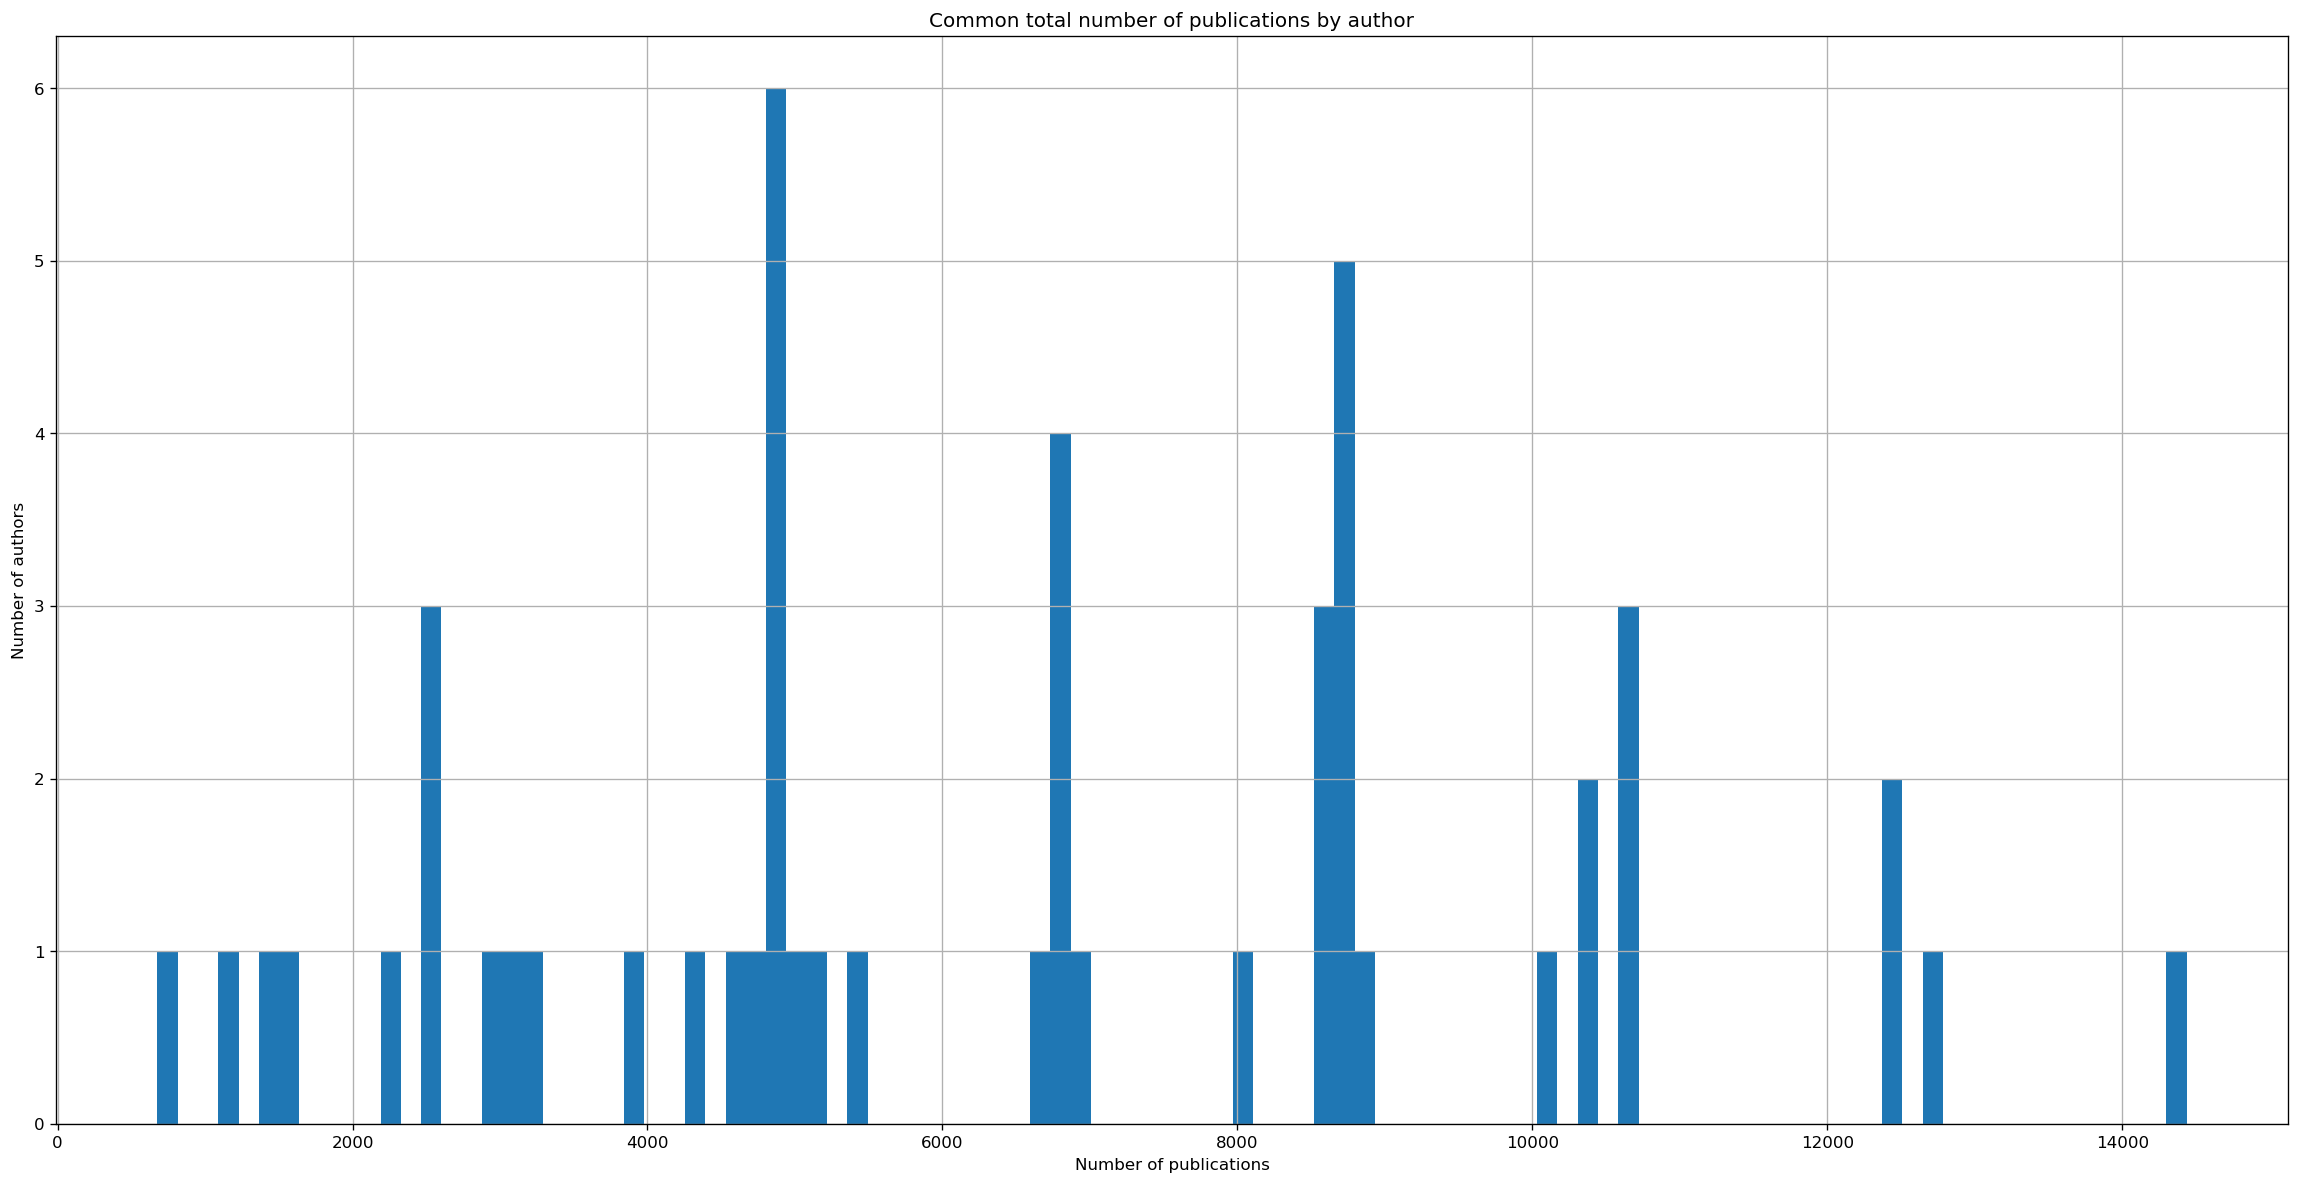

In [127]:
#determine the productivity
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df_publications['author'].value_counts(), bins=100)
plt.grid('both')
plt.xlabel("Number of publications")
plt.ylabel("Number of authors")
plt.title("Common total number of publications by author")

## Heatmap for publications
- Why? -> To visualize the general release schedule
- Get a 2D dataframe with row->author, column->date, value->num_entries
- Problem: It is hard to manually search for correlations and small values might go unnoticed (e.g. one publication)

In [147]:
# GENERAL FUNCTION FOR GENERATING HEATMAPS
import seaborn as sns
from datetime import datetime
from typing import List
import matplotlib.pyplot as plt

def productivity_heatmap(df, dates:List = [datetime(2012, 1, 1), datetime(2019, 12, 31)], authors:List = [], columns = ['author', 'date'], title = 'Chronological number of publications by author'):
    # Get a list of all the dates within range
    all_dates= pd.date_range(start=dates[0],end=dates[1]).to_list()
    str_dates = [date_value.strftime("%Y-%m-%d") for date_value in all_dates]
    # Add a "daily publisher" so that no dates are missed in the plot
    author = ["Daily Pub" for _ in range(len(all_dates))]
    df_daily_publisher = pd.DataFrame({'author': author , 'datetime':all_dates, 'date': str_dates})
    df = pd.concat([df_daily_publisher, df])
    # Filter by date
    if dates: # date within interval
        df = df[df['datetime'] >= dates[0]] # start date
        df = df[df['datetime'] <= dates[1]] # end date
    if authors: # select specific author
        authors.append("Daily Pub")
        df = df[df['author'].isin(authors)]
    df.sort_values(by='datetime', inplace=True)
    # Create the 2D array for a heatmap
    df_2D = df.value_counts(subset=['author', 'date']).unstack(level=1).fillna(0)
    df_2D.drop(["Daily Pub"], axis=0, inplace=True)
    if len(authors) < 5 and authors:
        plt.figure(figsize=(24, 3))
    sns.heatmap(df_2D, cmap = sns.cm.mako).set(title=title)
    # return df_2D

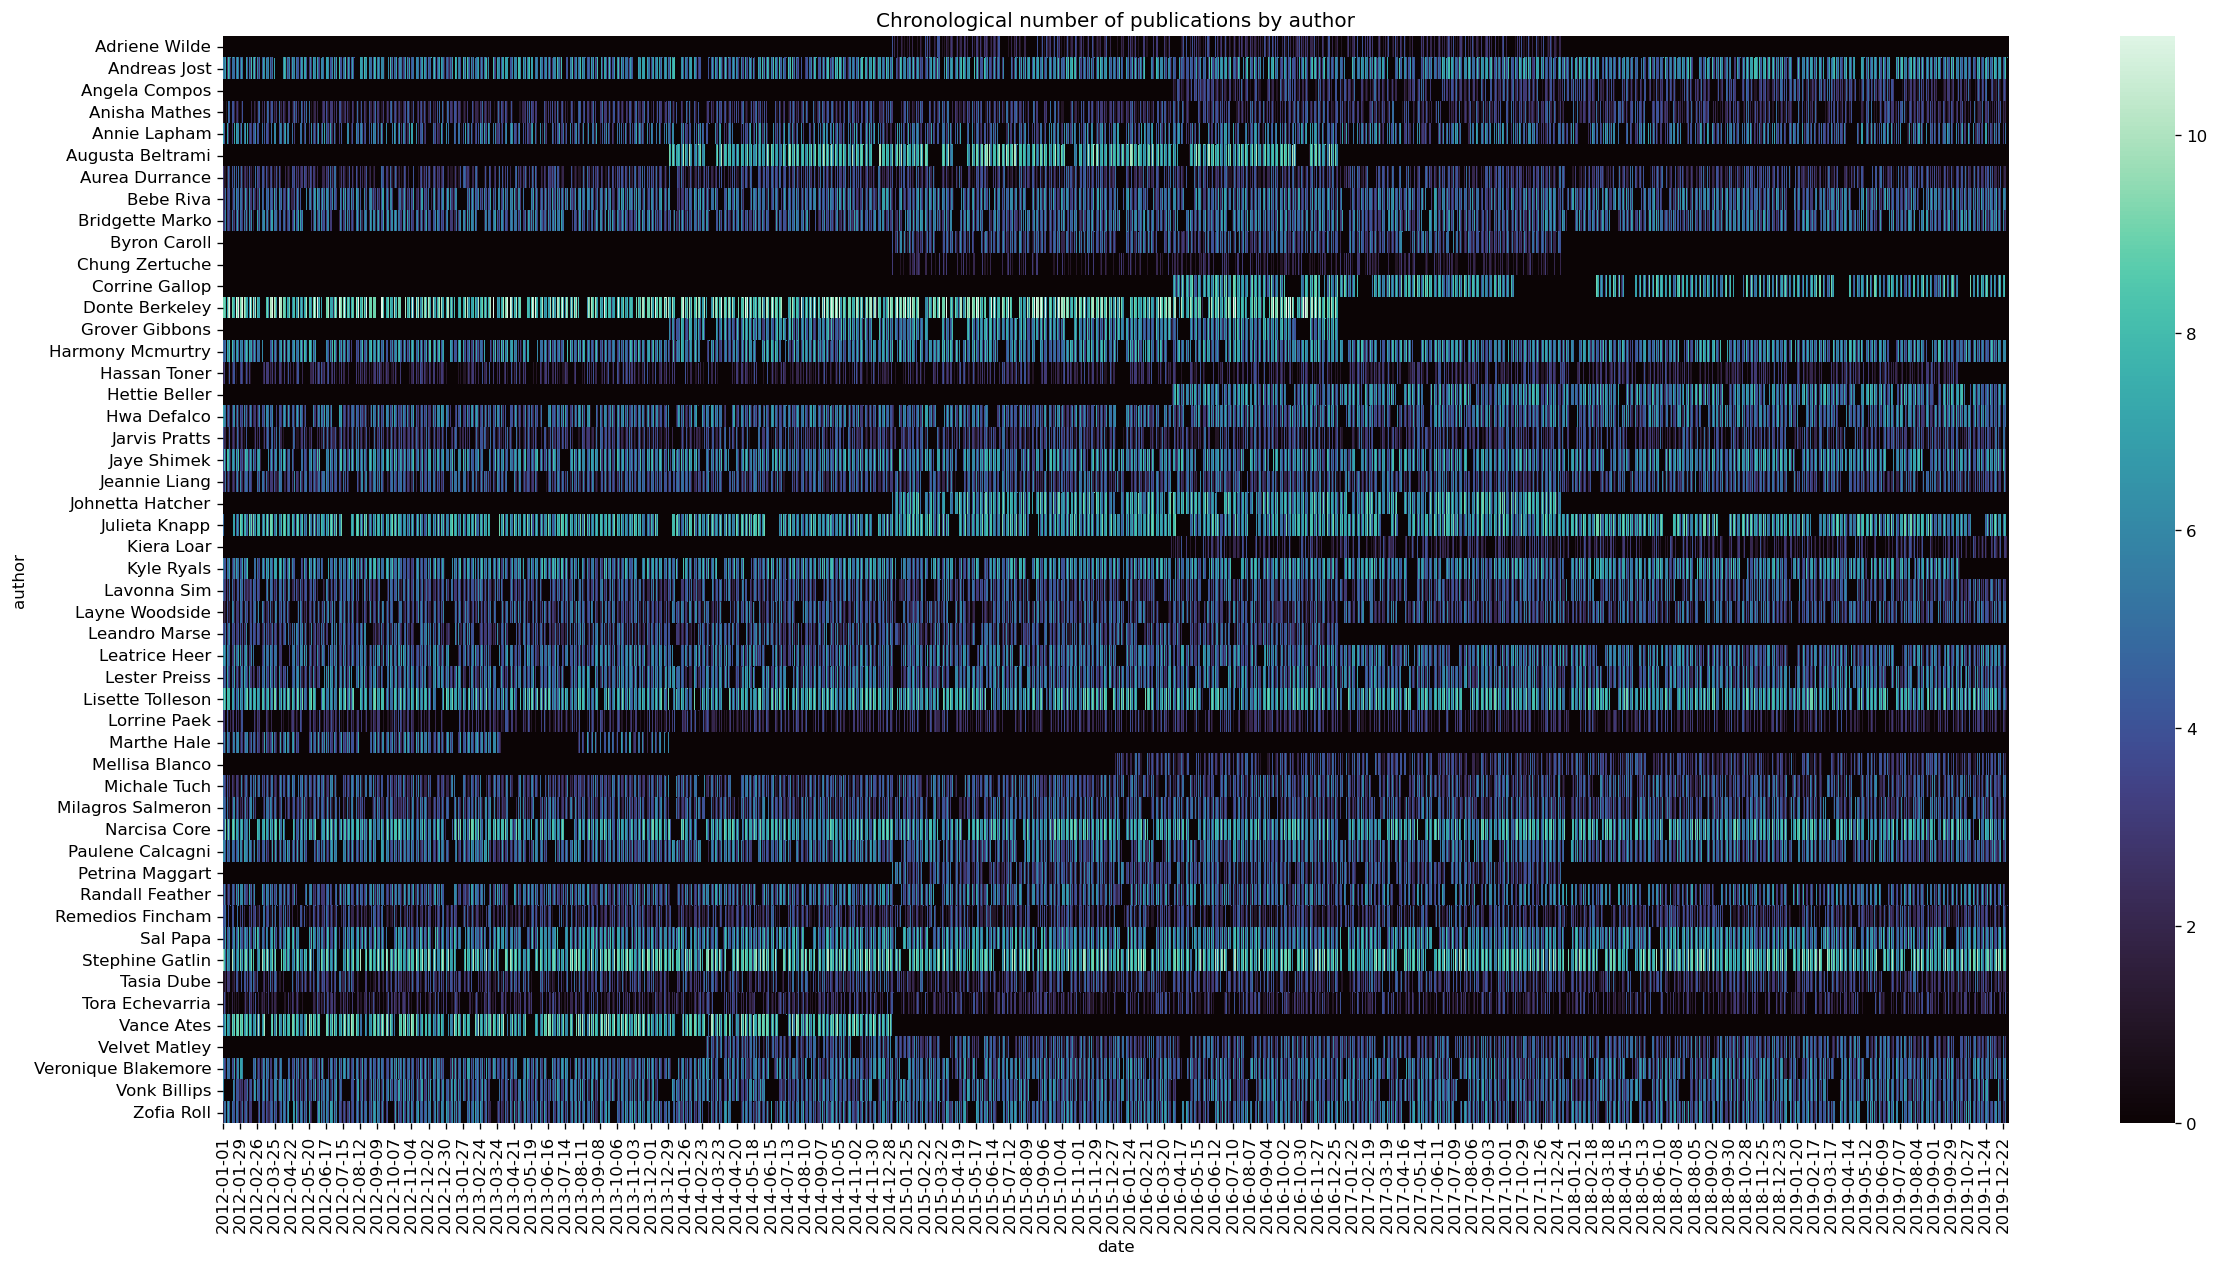

In [148]:
# HEATMAP FOR ALL EMPLOYEES
productivity_heatmap(df_publications)

### Do people take weekends off?
- Answer -> YES!

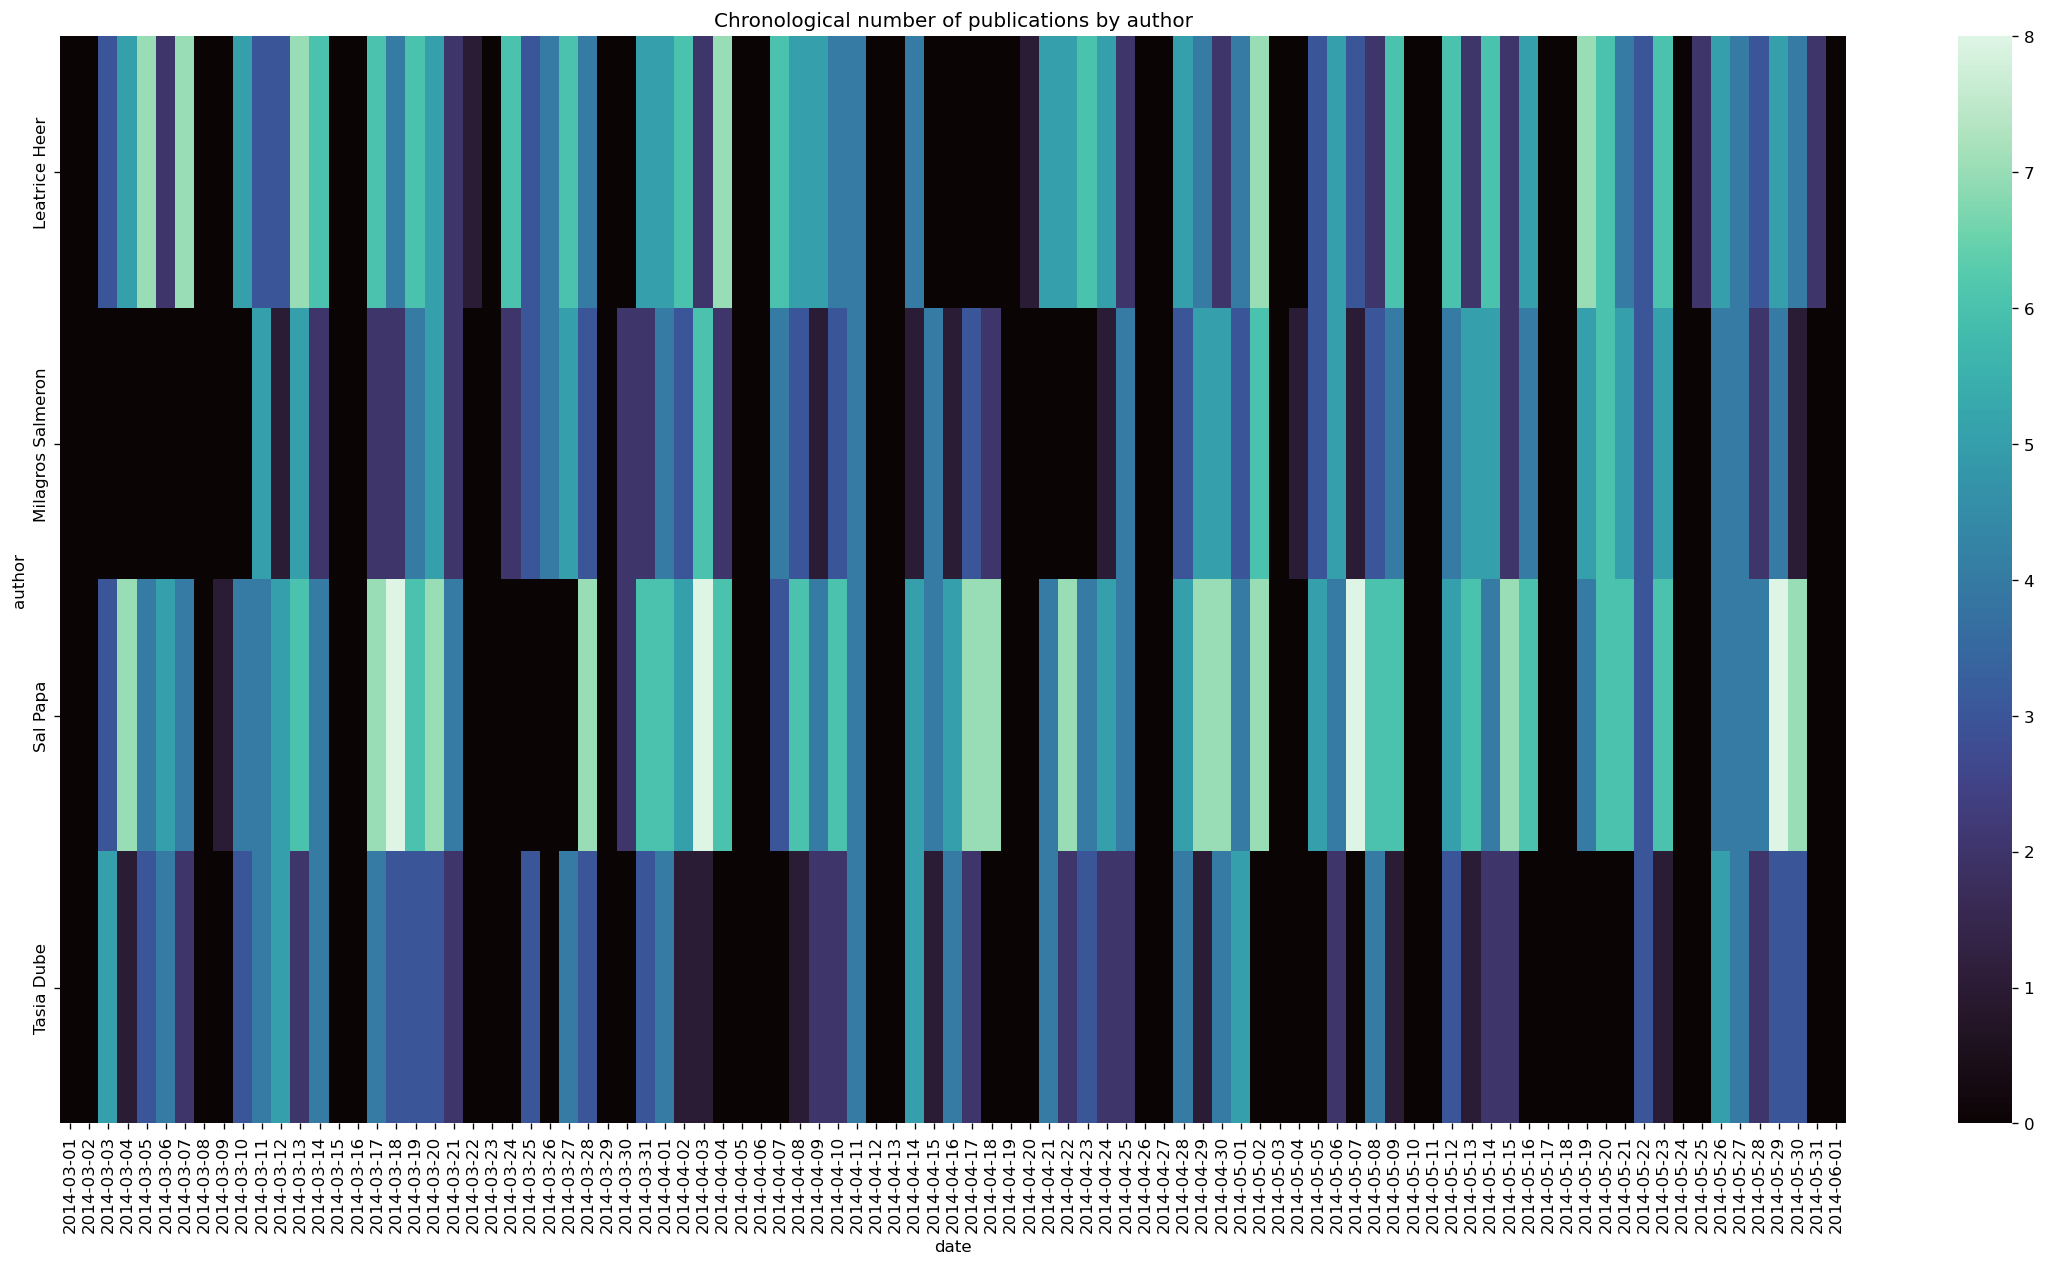

In [149]:
from datetime import datetime
productivity_heatmap(df_publications, authors=['Milagros Salmeron', 'Sal Papa', 'Tasia Dube', 'Leatrice Heer'], dates=[datetime(2014, 3, 1), datetime(2014, 6, 1)])

## Histogram with publication waiting times
- Why? -> To derive holiday periods and baby-time

Text(0.5, 0, 'Days since last publication')

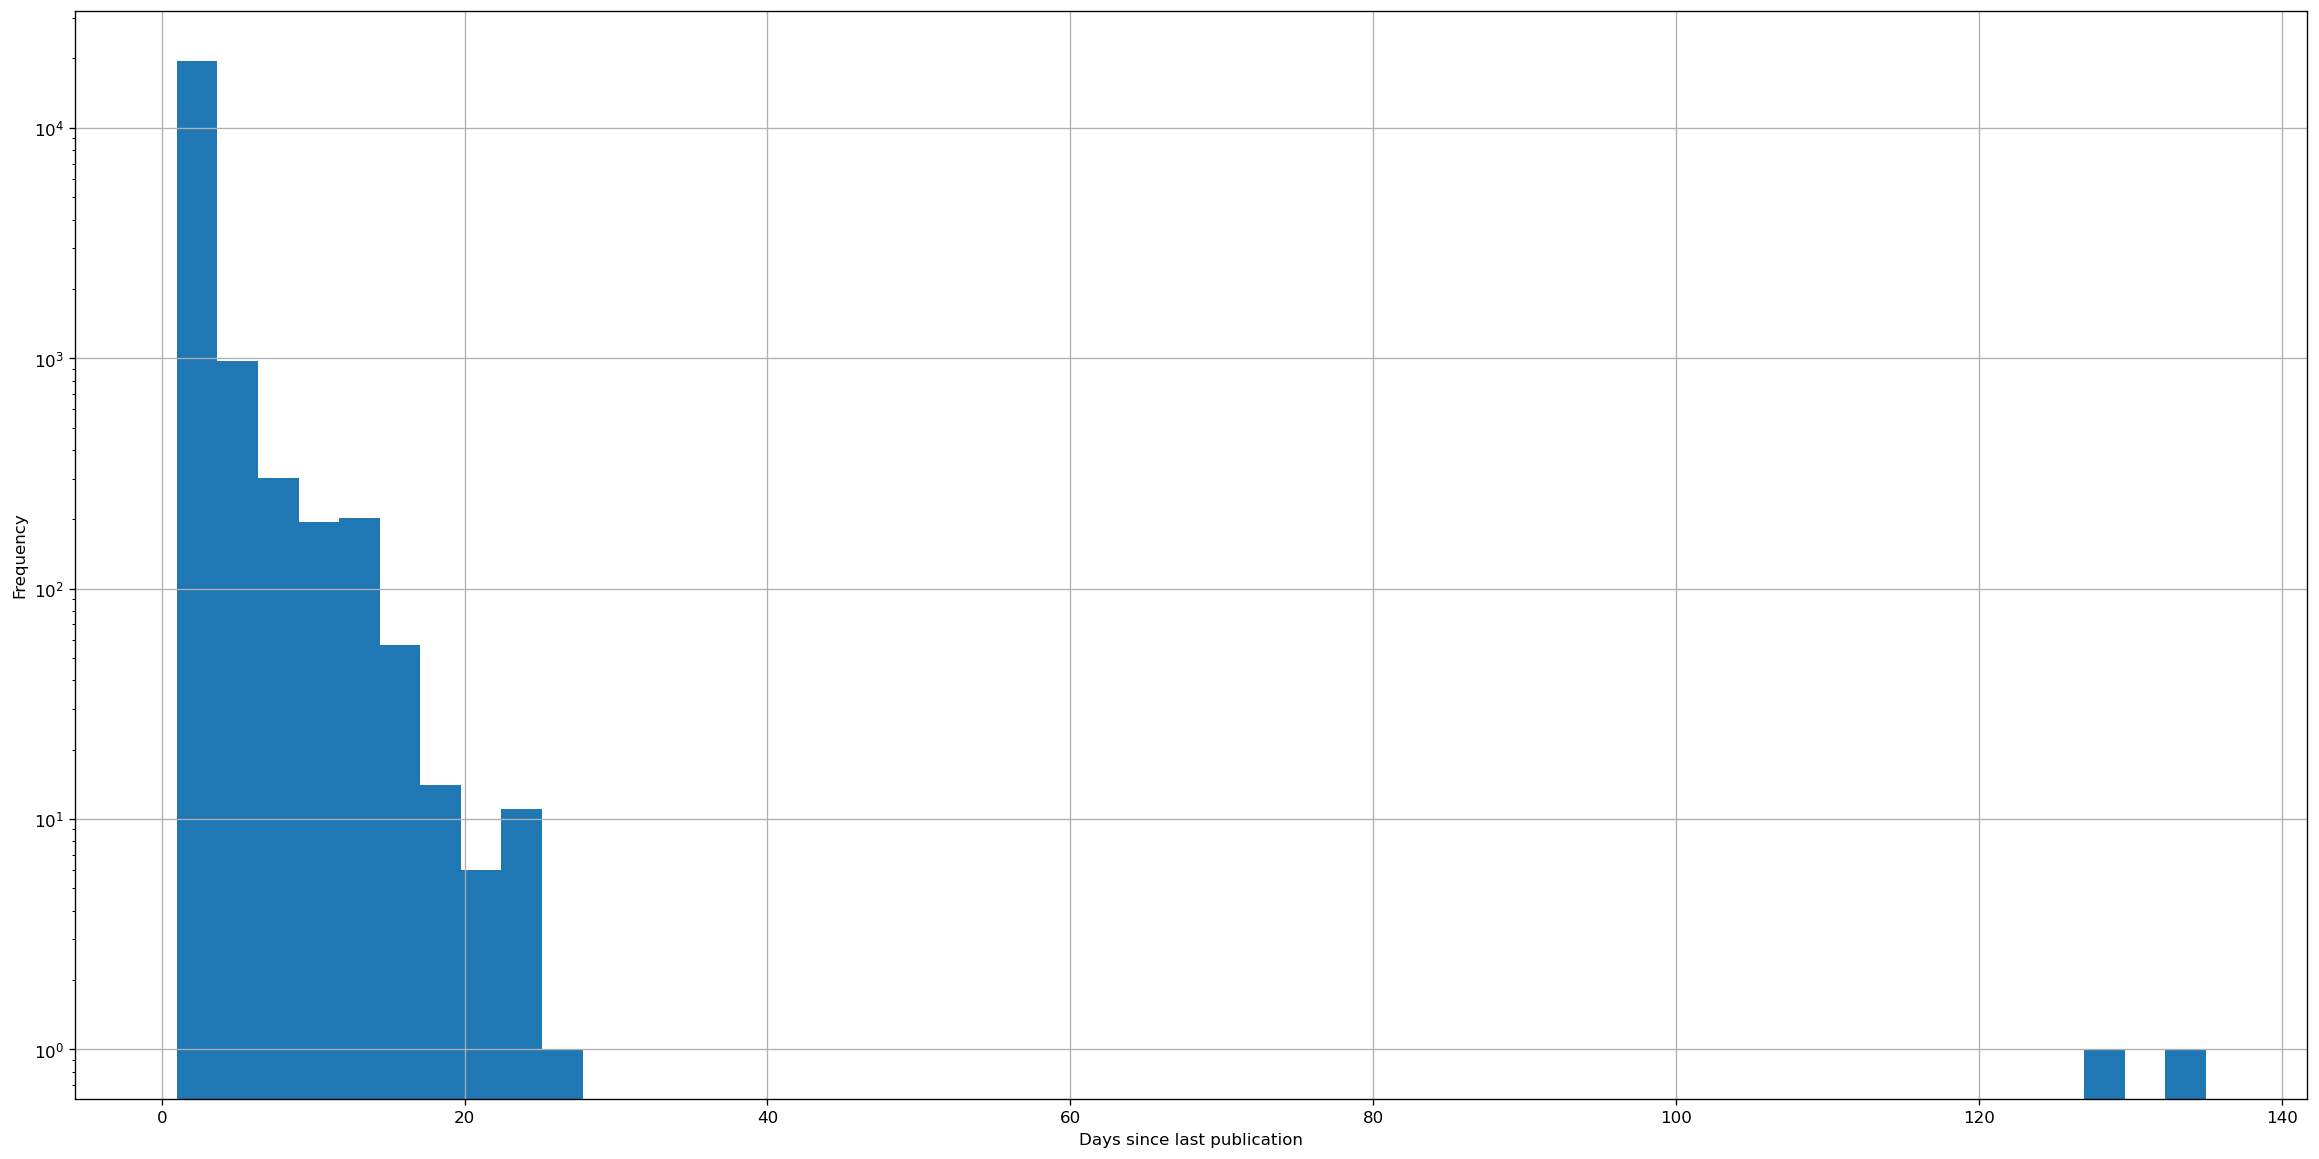

In [131]:
# Remember that 0 means that it was the first entry
at_least_hours = 24
plt.figure()
df_publications[df_publications["time_since_pub"] > pd.Timedelta(hours=at_least_hours)]['time_since_pub'].astype('timedelta64[D]').plot.hist(bins=50, log=True, grid='both')
plt.xlabel('Days since last publication')

### ANSWER QUSTION 2: DO PEOPLE HAVE BABIES?
2 people with babies potentially!

In [150]:
# SELECT EMPLOYESS WITH LONG BREAKS BASED ON HISTOGRAM
df_pregnancies = df_publications[df_publications["time_since_pub"] > pd.Timedelta(days=80)]
df_pregnancies.reset_index(inplace=True, drop=True)
df_pregnancies.head()

,link,author,date,time,datetime,name,surname,time_since_pub
0,https://jdestefani.github.io/SEN163A-TabularRa...,Marthe Hale,2013-08-05,09:17,2013-08-05 09:17:00,Marthe,Hale,127 days 15:29:00
1,https://jdestefani.github.io/SEN163A-TabularRa...,Corrine Gallop,2018-02-26,09:46,2018-02-26 09:46:00,Corrine,Gallop,135 days 16:35:00


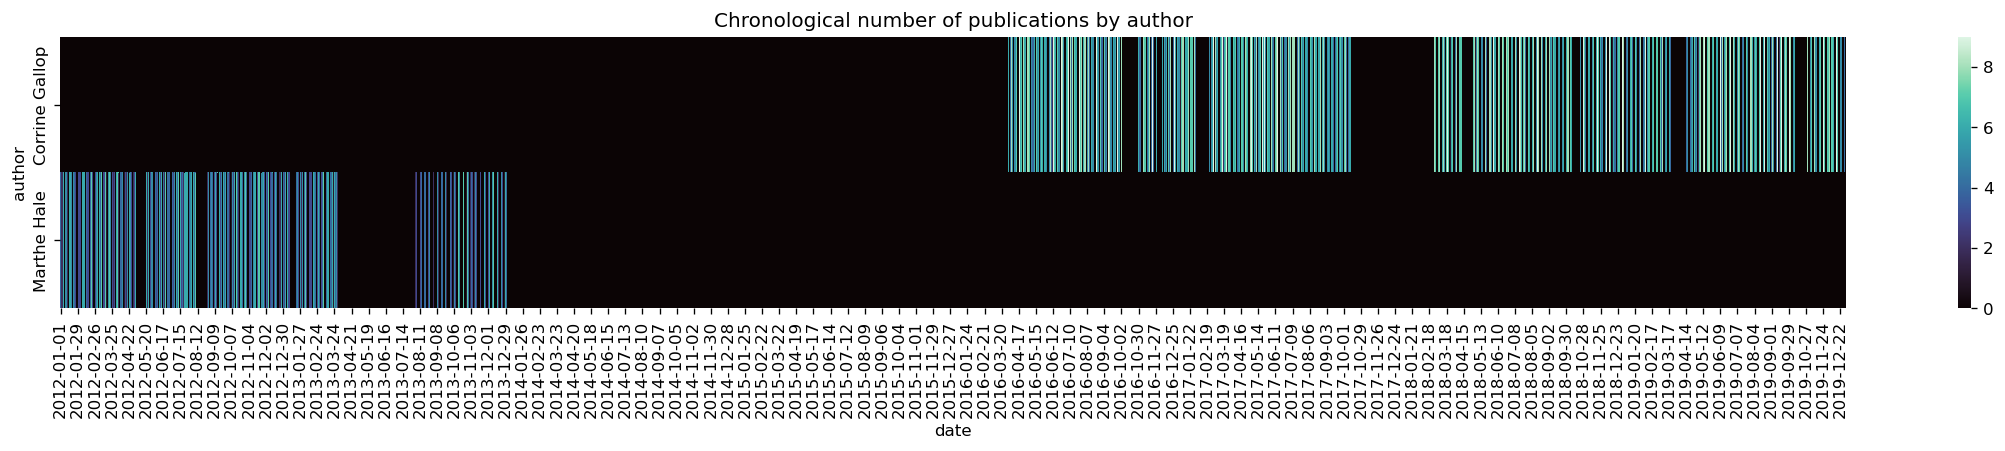

In [151]:
# SHOW PRODUCTIVITY
authors = ['Marthe Hale', 'Corrine Gallop']
productivity_heatmap(df_publications, authors=authors)

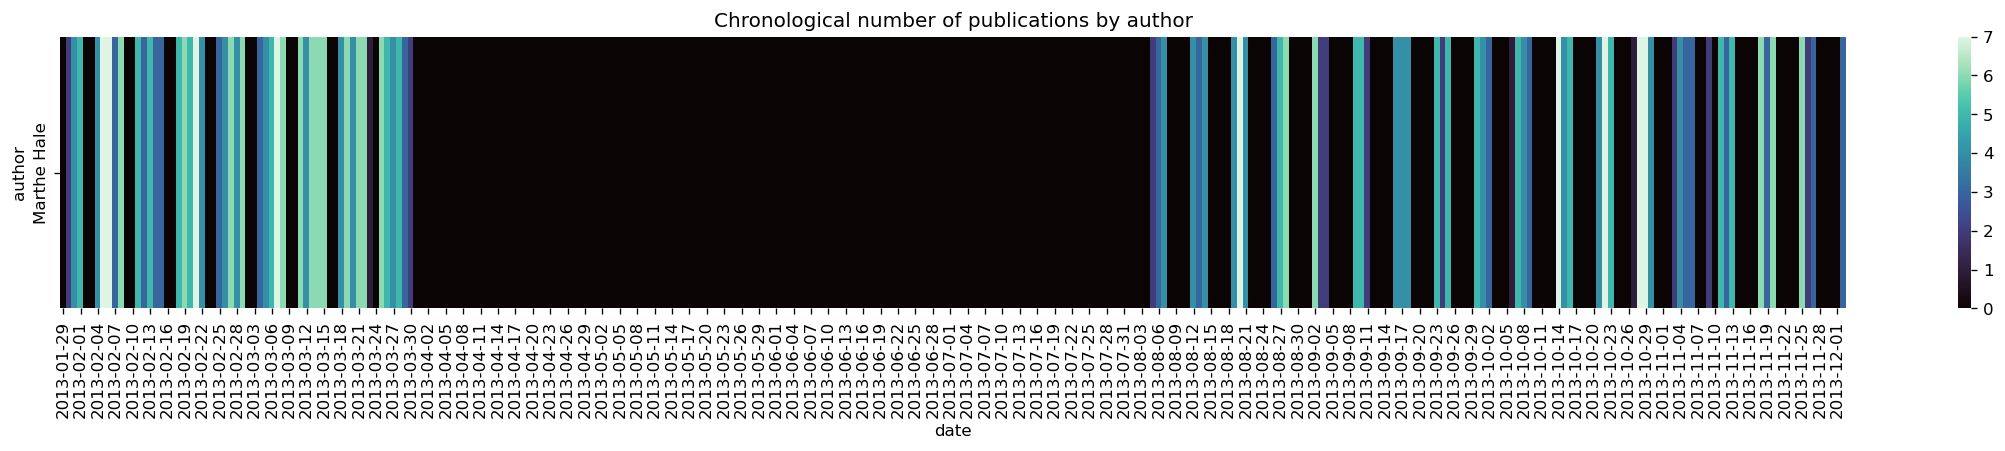

In [152]:
# SHOW PRODUCTIVITY
import datetime
pregnancy_num = 0
start_date = df_pregnancies.loc[pregnancy_num, 'datetime'] - df_pregnancies.loc[pregnancy_num, 'time_since_pub'] - datetime.timedelta(days=60)
end_date = df_pregnancies.loc[pregnancy_num, 'datetime'] + datetime.timedelta(days=120)
productivity_heatmap(df_publications, dates = [start_date, end_date], authors=[df_pregnancies.loc[pregnancy_num, 'author']])

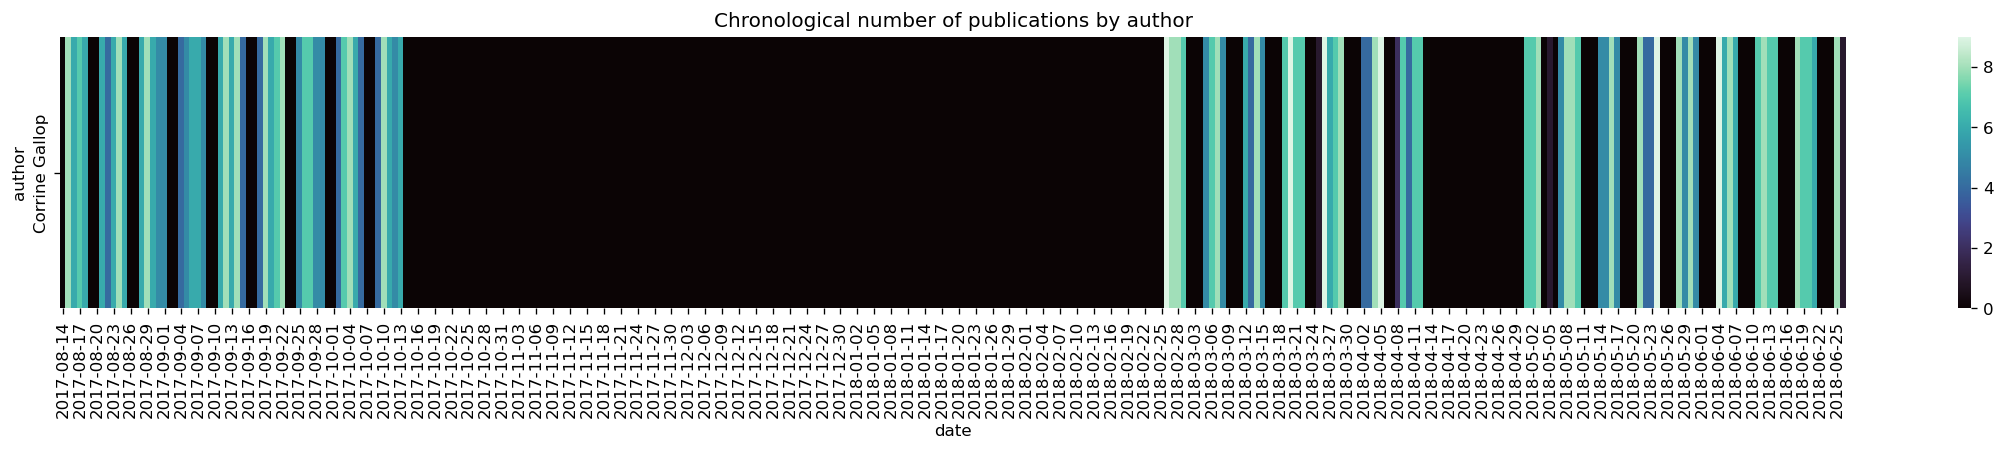

In [153]:
# SHOW PRODUCTIVITY
import datetime
pregnancy_num = 1
start_date = df_pregnancies.loc[pregnancy_num, 'datetime'] - df_pregnancies.loc[pregnancy_num, 'time_since_pub'] - datetime.timedelta(days=60)
end_date = df_pregnancies.loc[pregnancy_num, 'datetime'] + datetime.timedelta(days=120)
productivity_heatmap(df_publications, dates = [start_date, end_date], authors=[df_pregnancies.loc[pregnancy_num, 'author']])

## Common holidays
- [] Check if days_since_last_pub and date overlap for two people. If they do, they might be a couple.
  - Filter over 1 days leave (as 20 mins would be too little for instance)
  - Improve if needed based on the approximate holiday time

### Remove non-holiday entries
1. [] Make a table of author with total holidays (i.e. 1 day or more without writing). This is the average for all years.
    1. Exclude over 80 days.
    2. Exclude under 1 day.
    3. Exclude weekends 

In [154]:
# REMOVE NON-HOLIDAY ENTRIES
import numpy as np

df_holidays = df_publications.copy()
print(f"Original number of entries: {len(df_holidays.index)}")
# Remove 1 day entries
df_holidays.drop(df_holidays[df_holidays['time_since_pub'] < datetime.timedelta(days=1)].index, inplace=True)
print(f"Number of entries after removing less than 1 day entries: {len(df_holidays.index)}")
# Remove over 80 days
df_holidays.drop(df_holidays[df_holidays['time_since_pub'] > datetime.timedelta(days=80)].index, inplace=True)
print(f"Number of entries after removing over 80 days entries: {len(df_holidays.index)}")
# Remove weekends
df_holidays.drop(df_holidays[df_holidays['timedate'] - df_holidays[df_holidays['time_since_pub']].index, inplace=True)


# print(f"Number of entries after removing weekends: {}")

SyntaxError: invalid syntax (3109033566.py, line 13)

- [] Manually check using the heatmap if they are still together

## References 

UNC University. (2022). LibGuides: Metadata for Data Management: A Tutorial: Why Do I Need It? UNC University Library. https://guides.lib.unc.edu/metadata/importance

Kenny, C. (2022, March 25). Web Scraping: What It Is & How It Works - Zyte. Zyte (Formerly Scrapinghub) #1 Web Scraping Service. https://www.zyte.com/learn/what-is-web-scraping/